In [24]:
from tensorflow import keras
import tensorflow
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

from tqdm import tqdm

In [25]:
symbols_list = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [26]:
IMAGE_SIZE = (128,128) # 155x135 

In [27]:
tensorflow.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
# dataset_path = "train/"
# train_image = []
# train_label = []

# for symbols_dir in os.listdir(dataset_path):
#     if symbols_dir.split()[0] in symbols_list:
#         for image in os.listdir(os.path.join( dataset_path, symbols_dir)):
#             train_label.append(symbols_dir.split()[0])
#             train_image.append(os.path.join( dataset_path, symbols_dir, image))

In [29]:
# eval_path = "eval/"
# test_image = []
# test_label = []

# for symbols_dir in os.listdir(eval_path):
#     if symbols_dir.split()[0] in symbols_list:
#         for image in os.listdir( os.path.join (eval_path, symbols_dir)):
#             test_label.append(symbols_dir.split()[0])
#             test_image.append(os.path.join( eval_path, symbols_dir, image))

In [30]:
# X_train = []
# X_test = []

# # laoding the images from the path
# for path in tqdm(train_image):    
#     img = cv2.imread(path)
#     img = cv2.resize(img, IMAGE_SIZE)
#     img = np.array(img)
#     X_train.append(img)

# for path in tqdm(test_image):    
#     img = cv2.imread(path)
#     img = cv2.resize(img, IMAGE_SIZE)
#     img = np.array(img)     
#     X_test.append(img)

# # creating numpy array from the images
# X_train = np.array(X_train)
# X_test = np.array(X_test)

In [31]:
# # normalizing the data
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255


# X_train = 1 - X_train
# X_test = 1 - X_test
# print("X_train shape: ", X_train.shape)
# print("X_test shape: ", X_test.shape)

In [32]:
# print(train_image[0])
# print(train_label[0])
# plt.imshow(X_train[0])

In [33]:
# y_train = np.array([[0] * 16 for _ in range(len(train_label))])

# for i, category in enumerate(train_label):
#     index = symbols_list.index(category)
#     y_train[i][index] = 1
#     y_test = np.array([[0] * 16 for _ in range(len(test_label))])

# for i, category in enumerate(test_label):
#     index = symbols_list.index(category)
#     y_train[i][index] = 1

# print(y_test.shape)
# print(y_train.shape)

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 20

Train_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=keras.applications.resnet.preprocess_input)
Val_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=keras.applications.resnet.preprocess_input)

train_gen = Train_Datagen.flow_from_directory(directory = './train', target_size = (224, 224), color_mode = 'rgb', 
                                       batch_size = batch_size, class_mode = 'categorical', shuffle = True, seed = 42)

val_gen = Val_Datagen.flow_from_directory(directory = './eval', target_size = (224, 224), color_mode = 'rgb',
                                       batch_size = batch_size, class_mode = 'categorical', shuffle = True, seed = 42)

epochs = 10
Number_Of_Training_Images = train_gen.classes.shape[0]
steps_per_epoch = Number_Of_Training_Images/batch_size

NameError: name 'keras' is not defined

In [48]:
###  MODEL 

In [49]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [50]:
transfer_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))

In [51]:
# transfer_model.load_weights(filepath=resnet_weights_path, by_name=True)

In [52]:
# transfer_model.trainable = False

In [53]:
for layer in transfer_model.layers:
    layer.trainable = False

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [55]:
model2 = Sequential()
model2.add(transfer_model)
model2.add(Flatten())
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 16, activation = 'softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                4112      
                                                                 
Total params: 24,116,368
Trainable params: 528,656
Non-trainable params: 23,587,712
_________________________________________________________________


In [56]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size

In [57]:
x1 = keras.layers.Flatten()(transfer_model.output)
x1 = keras.layers.Dense(64, activation='relu')(x1)
x1 = keras.layers.Dropout(0.5)(x1)
x1 = keras.layers.Dense(16, activation='softmax')(x1)

model1 = keras.models.Model(inputs=transfer_model.input, outputs=x1)

In [58]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [59]:
model1.compile(optimizer = 'Adam', loss = keras.metrics.categorical_crossentropy, metrics = ['accuracy'])

history1 = model1.fit(train_gen, epochs = epochs, 
                    validation_data = val_gen, steps_per_epoch = STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)

Epoch 1/10
377/377 [==============================] - 54s 138ms/step - loss: 1.0444 - accuracy: 0.6595 - val_loss: 0.2641 - val_accuracy: 0.9380
Epoch 2/10
377/377 [==============================] - 51s 135ms/step - loss: 0.5273 - accuracy: 0.8210 - val_loss: 0.1576 - val_accuracy: 0.9650
Epoch 3/10
377/377 [==============================] - 50s 134ms/step - loss: 0.4034 - accuracy: 0.8623 - val_loss: 0.1349 - val_accuracy: 0.9740
Epoch 4/10
377/377 [==============================] - 53s 141ms/step - loss: 0.3598 - accuracy: 0.8761 - val_loss: 0.1073 - val_accuracy: 0.9670
Epoch 5/10
377/377 [==============================] - 51s 135ms/step - loss: 0.3259 - accuracy: 0.8856 - val_loss: 0.0841 - val_accuracy: 0.9800
Epoch 6/10
377/377 [==============================] - 49s 131ms/step - loss: 0.3007 - accuracy: 0.8911 - val_loss: 0.1020 - val_accuracy: 0.9760
Epoch 7/10
377/377 [==============================] - 50s 132ms/step - loss: 0.2726 - accuracy: 0.9050 - val_loss: 0.0834 - val_ac

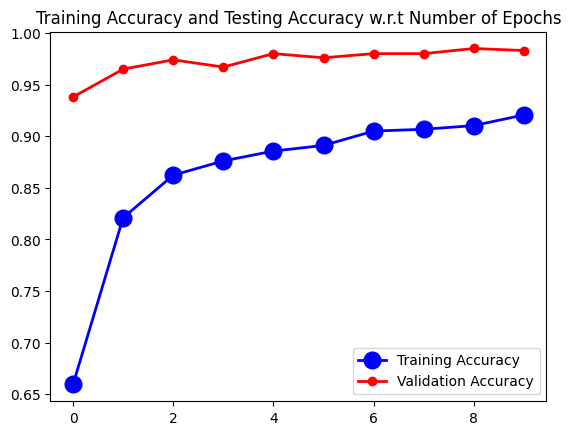

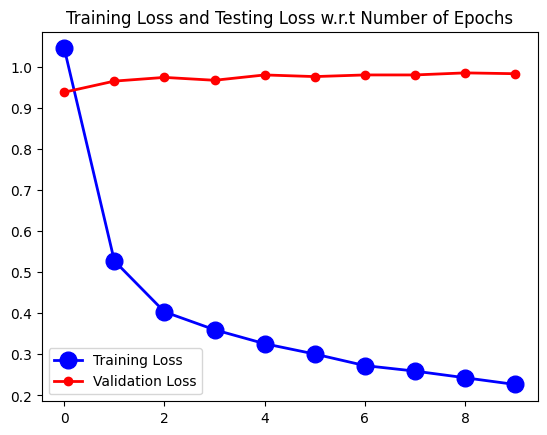

In [61]:
import matplotlib.pyplot as plt

train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
No_Of_Epochs = range(epochs)

plt.plot(No_Of_Epochs, train_acc, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Accuracy')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Accuracy')

plt.title('Training Accuracy and Testing Accuracy w.r.t Number of Epochs')

plt.legend()

plt.figure()

plt.plot(No_Of_Epochs, train_loss, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Loss')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Loss')

plt.title('Training Loss and Testing Loss w.r.t Number of Epochs')

plt.legend()

plt.show()

In [22]:
model2.compile(optimizer = 'Adam', loss = keras.metrics.categorical_crossentropy, metrics = ['accuracy'])

history2 = model2.fit(train_gen, epochs = epochs, 
                    validation_data = val_gen, steps_per_epoch = STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)

Epoch 1/10
377/377 [==============================] - 56s 137ms/step - loss: 0.5329 - accuracy: 0.8273 - val_loss: 0.1626 - val_accuracy: 0.9580
Epoch 2/10
344/377 [==========================>...] - ETA: 3s - loss: 0.2403 - accuracy: 0.9226

KeyboardInterrupt: 

In [ ]:
#x1 = keras.layers.MaxPooling1D()(transfer_model.output)
# transfer_model.layers[-1].trainable = True
# transfer_model.layers[-2].trainable = True
#x1 = keras.layers.Flatten()(transfer_model.output)
#x1 = keras.layers.Dropout(0.5)(x1)
#x1 = keras.layers.Dense(64, activation='relu')(x1)
#x1 = keras.layers.Dropout(0.5)(x1)
#x1 = keras.layers.Dense(16, activation='softmax')(x1)

#model1 = keras.models.Model(inputs=transfer_model.input, outputs=x1)

In [ ]:
#model1.summary()

In [ ]:
#model1.compile(optimizer=keras.optimizers.Adam(), loss=keras.metrics.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#len(X_train)

In [ ]:
#history2 = model1.fit(
#    X_train,
#    y_train,
#    epochs=10,
#    batch_size=16,
#    validation_split=0.2
#)

In [ ]:
#inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3))
#x = transfer_model(inputs)
#x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Flatten()(x)
#outputs = keras.layers.Dense(16, activation='softmax')(x)
#model = keras.Model(inputs, outputs)

In [ ]:
#model.summary()

In [ ]:
#model.compile(optimizer='adam', loss=keras.metrics.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#history = model.fit(
#    X_train,
#    y_train,
#    epochs=20,
#    batch_size=16
#)

In [ ]:
#from tensorflow.keras.preprocessing import image

In [ ]:
#img_path = '../projekat/characters/8.png'
#img = image.load_img(img_path, target_size=(32, 32))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#preds = model.predict(x)

#print(symbols_list[preds.argmax(axis=1)[0]])
#print(preds)